In [1]:
import os
import cv2
import numpy as np
from PIL import Image
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import keras

#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
#from tensorflow.keras.layers import Conv2D, MaxPooling2D

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

Using TensorFlow backend.


In [2]:
def mse(a,b):
    """function to compute the mean square error between two numpy arrays"""
    return np.square(a-b).mean()

def load_images(data_path):
    """Function to load images from NEU Dataset"""

    images=[] 
    labels=[] 

    for dirpath, dirnames, filenames in os.walk(data_path):
        for filename in filenames:
            defect=dirpath.split('\\')[-1] 
            if '.bmp' in filename:
                images.append(cv2.imread(os.path.join(dirpath,filename),0))
                labels.append(defect)

    images=np.asarray(images)
    labels=np.asarray(labels)

    return images, labels

In [22]:
data_path = r'C:\Users\mmatr\Desktop\Learning Data Science\IBM Machine Learning\Git\IBM-Machine-Learning-Course\Course_5_Deep_Learning\NEU Metal Surface Defects Data'
os.chdir(data_path)

data, labels = load_images(data_path)

In [23]:
#this is necessary to get the data into the form that to_categorical requires, namely an array of numeric labels
le = LabelEncoder()

labels_ohe = keras.utils.to_categorical(le.fit_transform(labels).reshape(-1,1), 6)

## Normalize Data

In [24]:
data=data/255

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, labels_ohe, test_size=0.15)

In [26]:
X_train = X_train.reshape(len(X_train),200,200,1)
X_test = X_test.reshape(len(X_test),200,200,1)

# First Model

This model will be a contain a single convolution layer. And serve as the skeleton for subsequent models

In [78]:
model = Sequential()
model.add(Conv2D(32, (2,2), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(4, 4))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 199, 199, 32)      160       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 76832)             0         
_________________________________________________________________
dense_65 (Dense)             (None, 256)               19669248  
_________________________________________________________________
dropout_40 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 6)                 1542      
Total params: 19,670,950
Trainable params: 19,670,950
Non-trainable params: 0
_________________________________________

In [79]:
history_model1 = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 14s 9ms/step - loss: 18.7849 - accuracy: 0.2824 - val_loss: 8.1170 - val_accuracy: 0.3667
Epoch 2/10
1530/1530 [==============================] - 21s 13ms/step - loss: 2.4804 - accuracy: 0.5804 - val_loss: 2.2597 - val_accuracy: 0.4370
Epoch 3/10
1530/1530 [==============================] - 20s 13ms/step - loss: 0.8110 - accuracy: 0.7595 - val_loss: 0.5198 - val_accuracy: 0.8111
Epoch 4/10
1530/1530 [==============================] - 20s 13ms/step - loss: 0.5242 - accuracy: 0.8418 - val_loss: 0.3786 - val_accuracy: 0.8407
Epoch 5/10
1530/1530 [==============================] - 20s 13ms/step - loss: 0.4272 - accuracy: 0.8542 - val_loss: 0.4871 - val_accuracy: 0.8333
Epoch 6/10
1530/1530 [==============================] - 20s 13ms/step - loss: 0.3242 - accuracy: 0.8928 - val_loss: 0.2704 - val_accuracy: 0.8963
Epoch 7/10
1530/1530 [==============================] - 20s 13ms/step - loss:

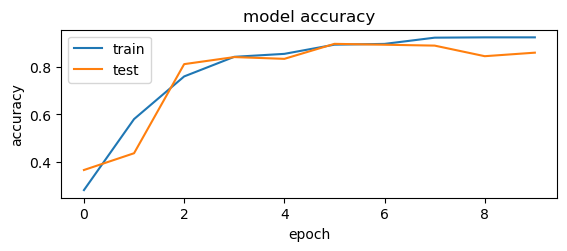

In [80]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model1.history['accuracy'])  
plt.plot(history_model1.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# Adam Optimizer 

Else the same as above

In [81]:
model = Sequential()
model.add(Conv2D(32, (2,2), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(4, 4))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 199, 199, 32)      160       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 76832)             0         
_________________________________________________________________
dense_67 (Dense)             (None, 256)               19669248  
_________________________________________________________________
dropout_41 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 6)                 1542      
Total params: 19,670,950
Trainable params: 19,670,950
Non-trainable params: 0
_________________________________________

In [82]:
history_model1a = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 15s 10ms/step - loss: 4.6951 - accuracy: 0.3549 - val_loss: 0.7913 - val_accuracy: 0.7259
Epoch 2/10
1530/1530 [==============================] - 24s 16ms/step - loss: 0.5708 - accuracy: 0.7758 - val_loss: 0.4892 - val_accuracy: 0.7926
Epoch 3/10
1530/1530 [==============================] - 23s 15ms/step - loss: 0.3862 - accuracy: 0.8582 - val_loss: 0.3790 - val_accuracy: 0.8667
Epoch 4/10
1530/1530 [==============================] - 22s 14ms/step - loss: 0.3939 - accuracy: 0.8562 - val_loss: 0.4745 - val_accuracy: 0.8667
Epoch 5/10
1530/1530 [==============================] - 22s 14ms/step - loss: 0.3640 - accuracy: 0.8765 - val_loss: 0.3873 - val_accuracy: 0.8556
Epoch 6/10
1530/1530 [==============================] - 23s 15ms/step - loss: 0.2460 - accuracy: 0.9157 - val_loss: 0.3478 - val_accuracy: 0.8704
Epoch 7/10
1530/1530 [==============================] - 23s 15ms/step - loss:

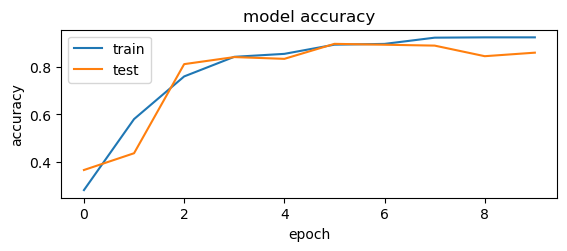

In [83]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model1.history['accuracy'])  
plt.plot(history_model1.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# Model 2 

Attempt to reduce overfitting of model 1 - Smaller Dense layer

In [84]:
model = Sequential()
model.add(Conv2D(32, (2,2), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(4, 4))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 199, 199, 32)      160       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 76832)             0         
_________________________________________________________________
dense_69 (Dense)             (None, 128)               9834624   
_________________________________________________________________
dropout_42 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 6)                 774       
Total params: 9,835,558
Trainable params: 9,835,558
Non-trainable params: 0
___________________________________________

In [85]:
history_model2 = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 11s 7ms/step - loss: 28.4010 - accuracy: 0.2203 - val_loss: 9.4136 - val_accuracy: 0.2481
Epoch 2/10
1530/1530 [==============================] - 18s 12ms/step - loss: 3.3053 - accuracy: 0.4418 - val_loss: 1.0850 - val_accuracy: 0.6296
Epoch 3/10
1530/1530 [==============================] - 17s 11ms/step - loss: 0.8953 - accuracy: 0.7163 - val_loss: 0.6987 - val_accuracy: 0.7185
Epoch 4/10
1530/1530 [==============================] - 17s 11ms/step - loss: 0.5982 - accuracy: 0.7993 - val_loss: 0.3820 - val_accuracy: 0.8519
Epoch 5/10
1530/1530 [==============================] - 17s 11ms/step - loss: 0.5064 - accuracy: 0.8412 - val_loss: 0.5034 - val_accuracy: 0.7963
Epoch 6/10
1530/1530 [==============================] - 16s 11ms/step - loss: 0.4179 - accuracy: 0.8510 - val_loss: 0.2893 - val_accuracy: 0.8852
Epoch 7/10
1530/1530 [==============================] - 16s 11ms/step - loss:

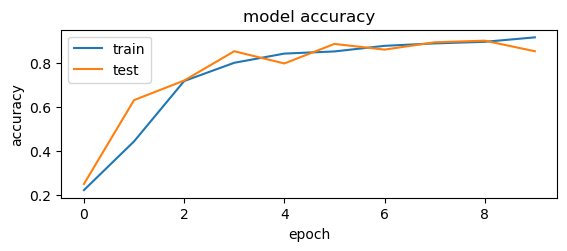

In [86]:

plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model2.history['accuracy'])  
plt.plot(history_model2.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# Filter size test

In [87]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(4, 4))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_31 (Flatten)         (None, 76832)             0         
_________________________________________________________________
dense_71 (Dense)             (None, 128)               9834624   
_________________________________________________________________
dropout_43 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 6)                 774       
Total params: 9,835,718
Trainable params: 9,835,718
Non-trainable params: 0
___________________________________________

In [88]:
history_model3 = model.fit(X_train,y_train,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 13s 8ms/step - loss: 8.2055 - accuracy: 0.3771 - val_loss: 1.7608 - val_accuracy: 0.3222
Epoch 2/10
1530/1530 [==============================] - 17s 11ms/step - loss: 1.0309 - accuracy: 0.6373 - val_loss: 1.2504 - val_accuracy: 0.6074
Epoch 3/10
1530/1530 [==============================] - 20s 13ms/step - loss: 0.7940 - accuracy: 0.7542 - val_loss: 0.5647 - val_accuracy: 0.8074
Epoch 4/10
1530/1530 [==============================] - 19s 12ms/step - loss: 0.7036 - accuracy: 0.7712 - val_loss: 0.7698 - val_accuracy: 0.7593
Epoch 5/10
1530/1530 [==============================] - 18s 12ms/step - loss: 0.8203 - accuracy: 0.8157 - val_loss: 0.3718 - val_accuracy: 0.8852
Epoch 6/10
1530/1530 [==============================] - 19s 12ms/step - loss: 0.5451 - accuracy: 0.8392 - val_loss: 2.6036 - val_accuracy: 0.3778
Epoch 7/10
1530/1530 [==============================] - 19s 12ms/step - loss: 

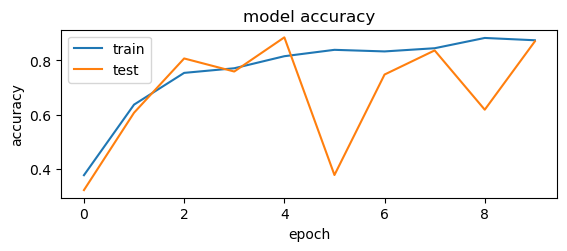

In [89]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model3.history['accuracy'])  
plt.plot(history_model3.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# Model with a second convolution layer

In [95]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
flatten_37 (Flatten)         (None, 73728)             0         
_________________________________________________________________
dense_83 (Dense)             (None, 256)               18874624  
_________________________________________________________________
dropout_49 (Dropout)         (None, 256)             

In [96]:
history_model4 = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 37s 24ms/step - loss: 2.0436 - accuracy: 0.4176 - val_loss: 1.0086 - val_accuracy: 0.6370
Epoch 2/10
1530/1530 [==============================] - 45s 30ms/step - loss: 0.7510 - accuracy: 0.7248 - val_loss: 0.7162 - val_accuracy: 0.6778
Epoch 3/10
1530/1530 [==============================] - 45s 30ms/step - loss: 0.5813 - accuracy: 0.7967 - val_loss: 0.5086 - val_accuracy: 0.8370
Epoch 4/10
1530/1530 [==============================] - 45s 29ms/step - loss: 0.4213 - accuracy: 0.8601 - val_loss: 0.3437 - val_accuracy: 0.8667
Epoch 5/10
1530/1530 [==============================] - 45s 29ms/step - loss: 0.2625 - accuracy: 0.9105 - val_loss: 0.3395 - val_accuracy: 0.8778
Epoch 6/10
1530/1530 [==============================] - 45s 29ms/step - loss: 0.3866 - accuracy: 0.8719 - val_loss: 0.2924 - val_accuracy: 0.8926
Epoch 7/10
1530/1530 [==============================] - 45s 30ms/step - loss:

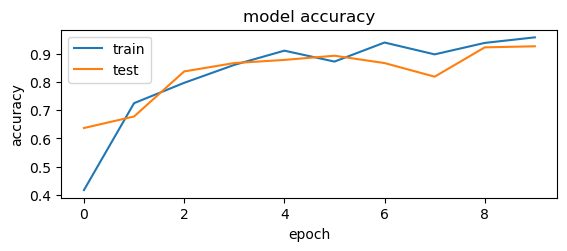

In [97]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model4.history['accuracy'])  
plt.plot(history_model4.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

## Increasing the number of filters on the second convolution layer

In [30]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 147456)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               37748992  
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)              

In [31]:
history_model4_2 = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 48s 32ms/step - loss: 3.2854 - accuracy: 0.3869 - val_loss: 1.0615 - val_accuracy: 0.5704
Epoch 2/10
1530/1530 [==============================] - 57s 37ms/step - loss: 0.6531 - accuracy: 0.7667 - val_loss: 0.6804 - val_accuracy: 0.7000
Epoch 3/10
1530/1530 [==============================] - 61s 40ms/step - loss: 0.4276 - accuracy: 0.8549 - val_loss: 0.5981 - val_accuracy: 0.7630
Epoch 4/10
1530/1530 [==============================] - 61s 40ms/step - loss: 0.3173 - accuracy: 0.9020 - val_loss: 0.2602 - val_accuracy: 0.8889
Epoch 5/10
1530/1530 [==============================] - 58s 38ms/step - loss: 0.3444 - accuracy: 0.8784 - val_loss: 0.4020 - val_accuracy: 0.8630
Epoch 6/10
1530/1530 [==============================] - 56s 37ms/step - loss: 0.3430 - accuracy: 0.8837 - val_loss: 0.4857 - val_accuracy: 0.8222
Epoch 7/10
1530/1530 [==============================] - 56s 37ms/step - loss:

In [33]:
history_model4_2a = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 52s 34ms/step - loss: 0.0844 - accuracy: 0.9745 - val_loss: 0.2195 - val_accuracy: 0.9259
Epoch 2/10
1530/1530 [==============================] - 57s 37ms/step - loss: 0.1510 - accuracy: 0.9490 - val_loss: 0.4302 - val_accuracy: 0.8778
Epoch 3/10
1530/1530 [==============================] - 55s 36ms/step - loss: 0.1296 - accuracy: 0.9569 - val_loss: 0.2507 - val_accuracy: 0.9185
Epoch 4/10
1530/1530 [==============================] - 56s 36ms/step - loss: 0.0789 - accuracy: 0.9771 - val_loss: 0.4806 - val_accuracy: 0.8778
Epoch 5/10
1530/1530 [==============================] - 56s 36ms/step - loss: 0.2335 - accuracy: 0.9288 - val_loss: 0.8529 - val_accuracy: 0.6630
Epoch 6/10
1530/1530 [==============================] - 59s 38ms/step - loss: 0.1670 - accuracy: 0.9405 - val_loss: 0.4228 - val_accuracy: 0.8444
Epoch 7/10
1530/1530 [==============================] - 63s 41ms/step - loss:

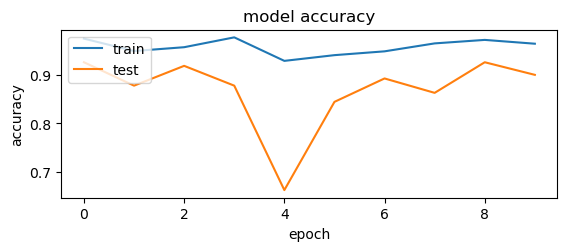

In [38]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model4_2a.history['accuracy'])  
plt.plot(history_model4_2a.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# 3 Convolution Layers

In [45]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 67712)           

In [46]:
history_model5 = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 61s 40ms/step - loss: 1.6618 - accuracy: 0.3843 - val_loss: 0.8926 - val_accuracy: 0.6185
Epoch 2/10
1530/1530 [==============================] - 67s 44ms/step - loss: 0.7727 - accuracy: 0.6980 - val_loss: 0.4568 - val_accuracy: 0.8333
Epoch 3/10
1530/1530 [==============================] - 68s 45ms/step - loss: 0.3784 - accuracy: 0.8654 - val_loss: 0.3364 - val_accuracy: 0.8778
Epoch 4/10
1530/1530 [==============================] - 68s 44ms/step - loss: 0.4181 - accuracy: 0.8484 - val_loss: 0.5873 - val_accuracy: 0.8148
Epoch 5/10
1530/1530 [==============================] - 64s 42ms/step - loss: 0.2935 - accuracy: 0.8980 - val_loss: 0.2849 - val_accuracy: 0.8778
Epoch 6/10
1530/1530 [==============================] - 63s 41ms/step - loss: 0.4004 - accuracy: 0.8680 - val_loss: 0.5469 - val_accuracy: 0.8000
Epoch 7/10
1530/1530 [==============================] - 63s 41ms/step - loss:

In [49]:
history_model5b = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 53s 35ms/step - loss: 0.1655 - accuracy: 0.9405 - val_loss: 0.3776 - val_accuracy: 0.8444
Epoch 2/10
1530/1530 [==============================] - 62s 41ms/step - loss: 0.9680 - accuracy: 0.6784 - val_loss: 1.2753 - val_accuracy: 0.4852
Epoch 3/10
1530/1530 [==============================] - 62s 40ms/step - loss: 0.8458 - accuracy: 0.6967 - val_loss: 1.0213 - val_accuracy: 0.5926
Epoch 4/10
1530/1530 [==============================] - 62s 40ms/step - loss: 0.6553 - accuracy: 0.7850 - val_loss: 0.4518 - val_accuracy: 0.8593
Epoch 5/10
1530/1530 [==============================] - 62s 41ms/step - loss: 0.2795 - accuracy: 0.9124 - val_loss: 0.3052 - val_accuracy: 0.9296
Epoch 6/10
1530/1530 [==============================] - 63s 41ms/step - loss: 0.4731 - accuracy: 0.8248 - val_loss: 0.2953 - val_accuracy: 0.9185
Epoch 7/10
1530/1530 [==============================] - 83s 54ms/step - loss:

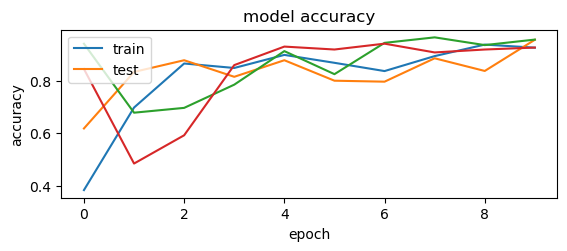

In [50]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model5.history['accuracy'])  
plt.plot(history_model5.history['val_accuracy'])
plt.plot(history_model5b.history['accuracy'])  
plt.plot(history_model5b.history['val_accuracy'])
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

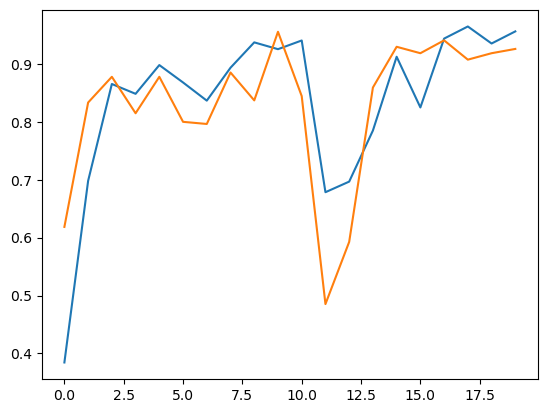

In [57]:
ep = np.array([i for i in range(20)])

plt.plot(ep,history_model5.history['accuracy'] + history_model5b.history['accuracy'])

plt.plot(history_model5.history['val_accuracy'] + history_model5b.history['val_accuracy'])

## 3 Convolution Layers, however I kept the third layer the same depth as the second.

In [42]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 33856)           

In [43]:
history_model5b = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 46s 30ms/step - loss: 1.8941 - accuracy: 0.2582 - val_loss: 1.5273 - val_accuracy: 0.3185
Epoch 2/10
1530/1530 [==============================] - 54s 35ms/step - loss: 1.1846 - accuracy: 0.5359 - val_loss: 0.8390 - val_accuracy: 0.7148
Epoch 3/10
1530/1530 [==============================] - 54s 35ms/step - loss: 0.5994 - accuracy: 0.8170 - val_loss: 0.4824 - val_accuracy: 0.7963
Epoch 4/10
1530/1530 [==============================] - 54s 35ms/step - loss: 0.4228 - accuracy: 0.8523 - val_loss: 0.3242 - val_accuracy: 0.8926
Epoch 5/10
1530/1530 [==============================] - 54s 35ms/step - loss: 0.6230 - accuracy: 0.7765 - val_loss: 0.7114 - val_accuracy: 0.7148
Epoch 6/10
1530/1530 [==============================] - 53s 35ms/step - loss: 0.3772 - accuracy: 0.8667 - val_loss: 0.3080 - val_accuracy: 0.9296
Epoch 7/10
1530/1530 [==============================] - 54s 35ms/step - loss:

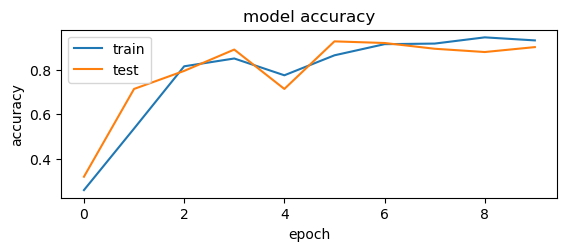

In [44]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model5b.history['accuracy'])  
plt.plot(history_model5b.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()